# Step 1. Sentence input

Syntax-based Model

/Users/susman/opt/anaconda3/envs/QC2022/lib/python3.8/site-packages/lambeq/ccg2discocat/ccg_parser.py:23: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


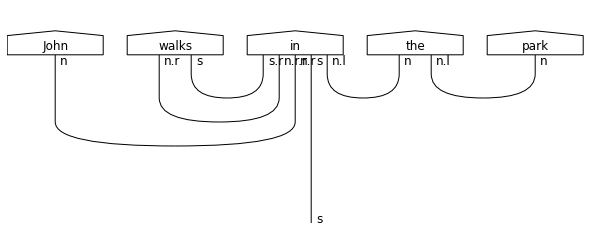

In [1]:
from lambeq import BobcatParser
from discopy import grammar

sentence = 'John walks in the park'

# Parse the sentence and convert it into a string diagram
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14,3), fontsize=12)

Bag-of-words Model

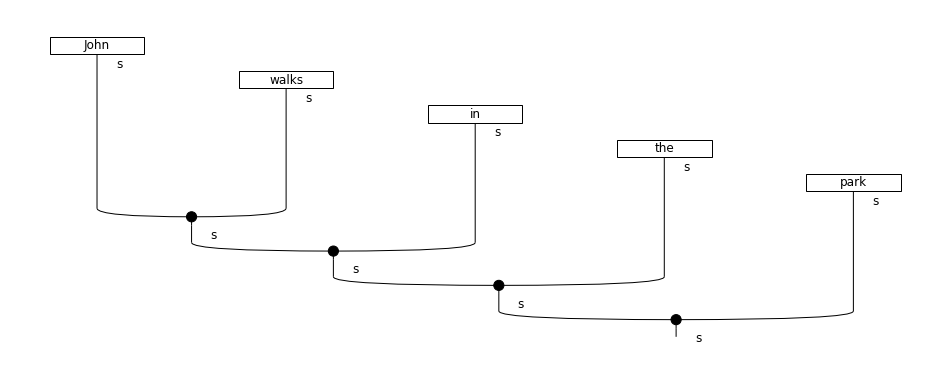

In [2]:
from lambeq import spiders_reader

# Create string diagrams based on spiders reader
spiders_diagram = spiders_reader.sentence2diagram(sentence)

# Not a pregroup diagram, we can't use grammar.draw()
spiders_diagram.draw(figsize=(13,5), fontsize=12)

Word-sequence Model

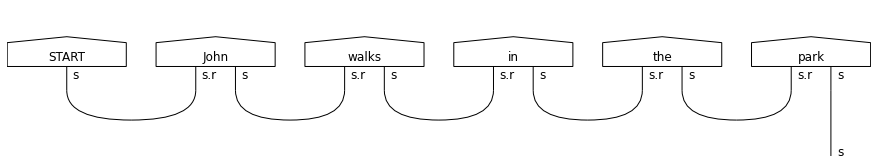

In [3]:
from lambeq.reader import cups_reader

# Create string diagrams based on cups reader
cups_diagram = cups_reader.sentence2diagram(sentence)

grammar.draw(cups_diagram, figsize=(12,3), fontsize=12)

# Step 2. Diagram rewriting

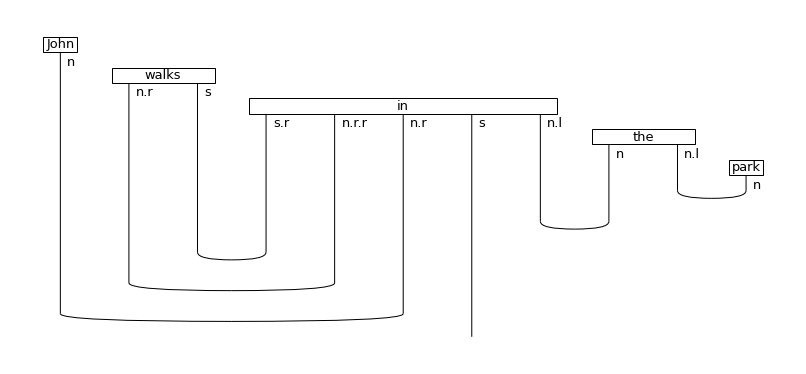

In [4]:
from lambeq import BobcatParser

# Parse the sentence
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram("John walks in the park")

diagram.draw(figsize=(11,5), fontsize=13)

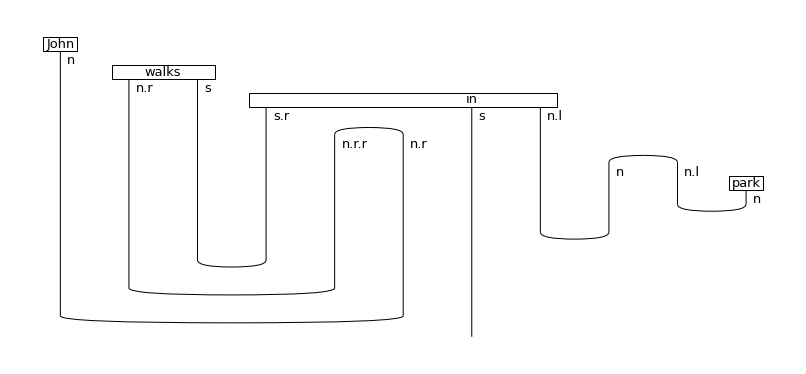

In [5]:
from lambeq import Rewriter

# Apply rewrite rule for prepositional phrases

rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=13)

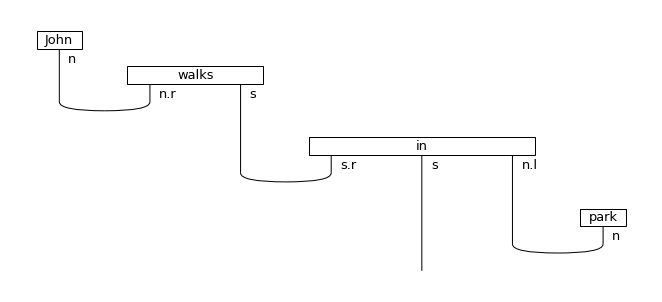

In [6]:
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

# Step 3. Parameterisation

Quantum case

In [7]:
from lambeq import BobcatParser

sentence = 'John walks in the park'

# Get a string diagram
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

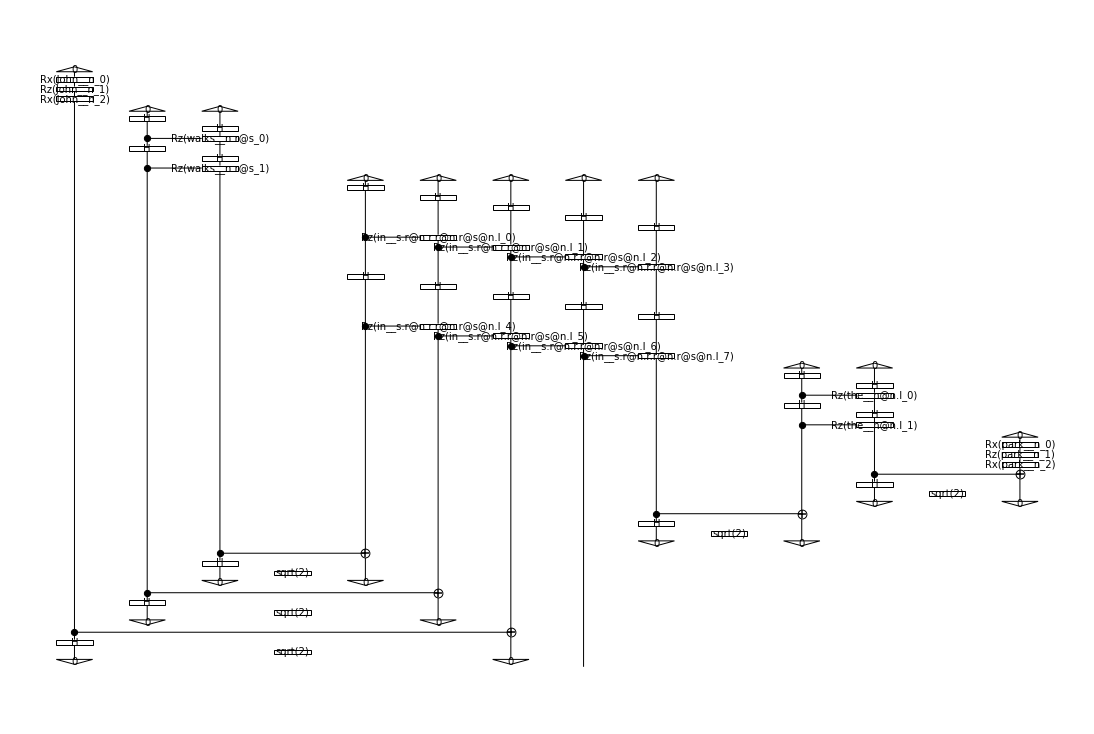

In [8]:
from lambeq import AtomicType, IQPAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

In [9]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

Classical case

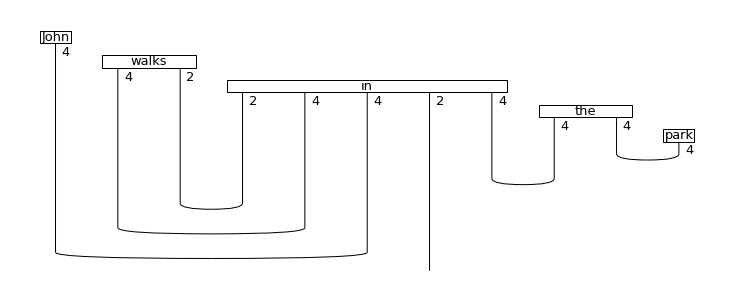

In [11]:
from lambeq import TensorAnsatz
from discopy import Dim

tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)
# parameterise a TensorAnsatz instance with dn = 4 for the base dimension of the noun space, 
# and ds=2 as the dimension of the sentence space:

Matrix product states

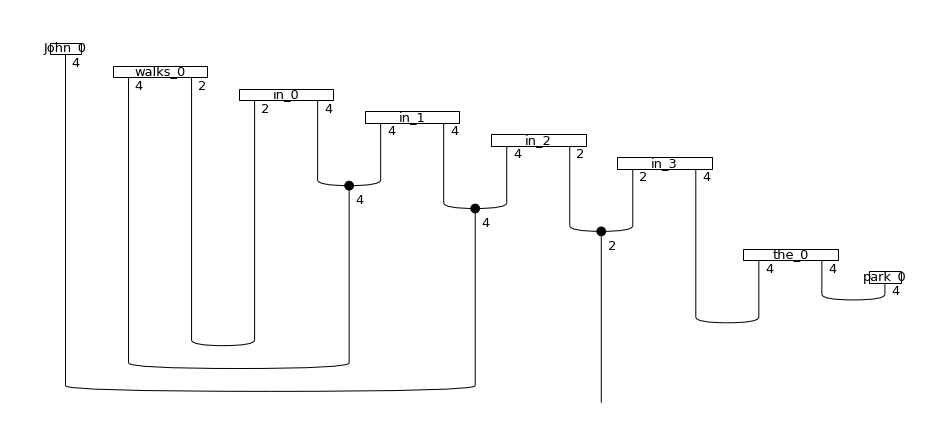

In [12]:
from lambeq import SpiderAnsatz
from discopy import Dim

spider_ansatz = SpiderAnsatz({N: Dim(4), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

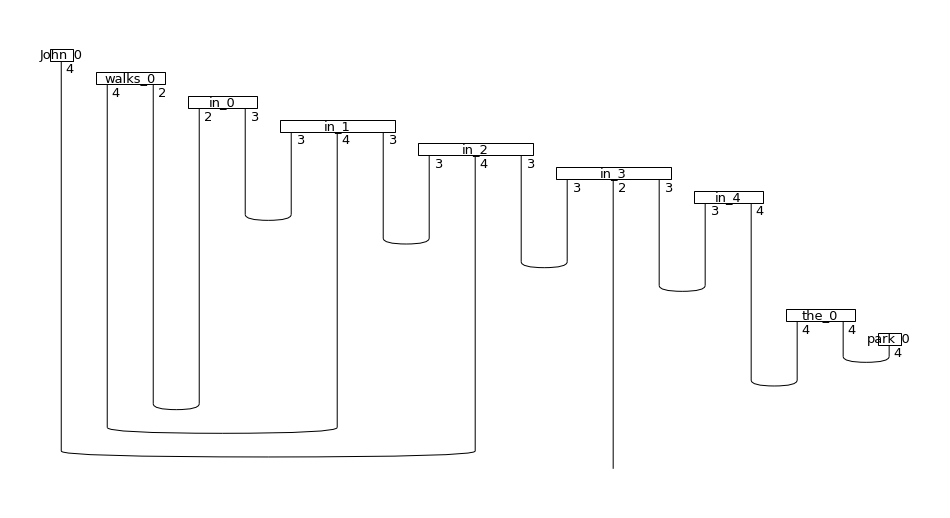

In [13]:
from lambeq import MPSAnsatz
from discopy import Dim

mps_ansatz = MPSAnsatz({N: Dim(4), S: Dim(2)}, bond_dim=3)
mps_diagram = mps_ansatz(diagram)
mps_diagram.draw(figsize=(13,7), fontsize=13)